In [1]:
import sys
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')
import os
from importlib import reload
import pandas as pd
import seaborn as sns
from scipy.stats import zscore


import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline

In [2]:
from glycompare import *
import glycompare.glycan_io


Thanks for using the GlyCompare v1.1, 
Please check our github for the latest update.


Bokan & Ben,
10/1/2019




# Generate candidate glycan

In [5]:
from glypy.algorithms.subtree_search.inclusion import subtree_of

feature_name = ['G79412GP', 'G86696LV', 'G17689DH', '3055.1', 'G49721VX', 'G80393PG', '2401.1', '2693.2', 'G80264ZA', '3416.1', 'G76812VG', 'G07483YN', 'G07568IR', 'G79457WN', '3865.1', 'G75308SV', 'G80858MF', 'G54953LX', 'G00176HZ', 'G09280JF', 'G39439UR', 'G54338PJ', 'G60415BS', 'G04483SK', 'G10691MJ', 'G58667NI', '4675.1', 'G88966ZO', '4587.1', '5312.1', 'G90130AG', '3457.1', '4041.1', '5486.1', 'G40242TG', 'G20924UR', 'G30460NZ', 'G37597FW', 'G39813YP', 'G05098FE', '2605.1', 'G23295TF', '3592.1', '3416.2', 'G99891PR', 'G12398HZ', 'G56516KW', '2967.1', 'G39764AC', 'G05203UQ', 'G85809SI', '3416.3', '1754.1', 'G49604DB', 'G88127MB']
glycan_dict_1 =glycan_io.load_glycan_obj_from_glycoct_file('../example_data/paper_epo_2/glycoct/')
print(sorted(list(glycan_dict_1.keys())))
glycan_dict = glycan_io.load_glycan_dict_from_json('../example_data/paper_epo/output_data/paper_epo_glycan_glycoct_dict.json')
# glycan_dict_1 = glycan_io.load_glycan_dict_from_json('../example_data/paper_epo_2/output_data/paper_epo_glycan_glycoct_dict.json')
new_glycan_dict = {}
missing_list = []
for i in feature_name:
    print('testing', i)
    _found = False
    for j in glycan_dict_1:
        if subtree_of(glycan_dict[i], glycan_dict_1[j], exact=False)==1 and \
            subtree_of( glycan_dict_1[j], glycan_dict[i], exact=False)==1:
            print(i, 'matching', j)
            new_glycan_dict[j]=glycan_dict_1[j]
            _found =True
    if not _found:
        print('missing', i)
        missing_list.append(i)
        

['1375.1', '1417.1', '1580.1', '1591.1', '1662.1', '1754.1', '1795.1', '1836.1', '2040.1', '2040.2', '2070.1', '2081.1', '2081.2', '2156.1', '2244.1', '2244.2', '2244.3', '2285.1', '2326.1', '2401.1', '2401.2', '2489.1', '2530.1', '2605.1', '2605.2', '2605.3', '2605.4', '2605.5', '2646.1', '2693.1', '2693.3', '2693.4', '2693.5', '2734.1', '2792.1', '2892.1', '2939.1', '2967.1', '2967.2', '2967.3', '3055.1', '3055.2', '3055.3', '3055.4', '3096.1', '3143.1', '3143.2', '3212.1', '3242.2', '3388.1', '3416.1', '3416.2', '3416.3', '3416.4', '3416.5', '3457.1', '3504.1', '3504.2', '3504.3', '3592.2', '3605.1', '3661.1', '3777.1', '3777.2', '3865.1', '3865.2', '3865.3', '3953.1', '4022.1', '4041.1', '4041.2', '4052.1', '4226.1', '4226.2', '4226.3', '4314.1', '4402.1', '4413.1', '4490.1', '4587.1', '4675.1', '4675.2', '4675.3', '4763.1', '4851.1', '4862.1', '5037.1', '5037.2', '5312.1', '5486.1', '5486.2']
testing G79412GP
G79412GP matching 2892.1
testing G86696LV
G86696LV matching 4226.3
G8669

In [6]:
glycan_io.output_glycan_dict_to_glycoct_dict(new_glycan_dict, '../example_data/merging_network/new_glycan_dict.json')

In [7]:
from glycompare.glycoct2linear import glycoct2linear
# new_glycan_dict = glycan_io.load_glycan_dict_from_json('../example_data/merging_network/new_glycan_dict.json')
string_list = {}

for i in new_glycan_dict:
#     print(i)
    string_list[i]=glycoct2linear(new_glycan_dict[i])
json_utility.store_json('../example_data/merging_network/vec_linear.json',string_list)

# convert glycan to glycoct

In [9]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
linkage_specific = True
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//'
project_name = "mapping"
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, )
keywords_dict

{'project_name': 'mapping',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//output_data/mapping_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//output_data/mapping_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//output_data/mapping_substructure_glycoct_dic

In [34]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
File doesn't exist: /Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//glycoct/
created /Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//glycoct/
created /Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//source_data/
created /Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//output_data/
created /Users/apple/PycharmProjects/GlyCompare/example_data/merging_network//output_plot/
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [38]:
glycan_substructure_glycoct_dict_addr = keywords_dict['glycan_substructure_glycoct_dict_addr']
glycan_substructure_dic = extract_substructures.extract_substructures_pip(glycan_dict=new_glycan_dict,
                                                                          gly_len=23,
                                                                          output_file=glycan_substructure_glycoct_dict_addr,
                                                                          num_processors=num_processors)

start parallel parsing 88 glycans
start 1375.1
start 1417.1
start 1580.1
start 1754.1
start 1662.1
start 1795.1
start 1591.1
start 1836.1
1375.1 6 0.08403706550598145
start 2040.2
1417.1 6 0.0936729907989502
start 2040.1
1580.1 7 0.10571789741516113
start 2070.1
1591.1 7 0.12921977043151855
1662.1 7 0.13880181312561035
start 2081.1
start 2081.2
1754.1 8 0.22937321662902832
1795.1 8 0.25511693954467773
start 2156.1
start 2244.2
1836.1 8 0.2568800449371338
start 2244.3
2040.2 9 0.39700984954833984
2040.1 9 0.4094560146331787
start 2244.1
start 2285.1
2070.1 9 0.40065884590148926
start 2326.1
2081.2 9 0.43665409088134766
start 2401.2
2081.1 9 0.4744117259979248
start 2401.1
2156.1 9 0.4437711238861084
start 2489.1
2244.2 10 0.8462791442871094
start 2530.1
2244.3 10 0.909074068069458
start 2605.3
2244.1 10 0.8139767646789551
start 2605.4
2285.1 10 0.9363350868225098
start 2605.1
2401.2 10 0.8751699924468994
2401.1 10 0.88863205909729
start 2605.5
start 2605.2
2326.1 10 1.014117956161499
st

In [41]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

merge_substructure_dict = merge_substructure_vec.merge_substructure_dict_pip(
                    glycan_substructure_dict=glycan_substructure_dic,
                    glycan_dict=new_glycan_dict,
                    linkage_specific=True,
                    num_processors=8,
                    output_merged_substructure_glycoct_dict_addr=substructure_glycoct_dict_addr)

Start merge_glycan_substructure_to_substructure_dict
combine original
substructure_dict is merged with len  41187
finished removing duplicate
after the cleaning the substructure vec's length is 5480
1 6
2 14
3 21
4 39
5 66
6 109
7 171
8 256
9 358
10 463
11 550
12 606
13 625
14 602
15 534
16 429
17 304
18 184
19 93
20 37
21 11
22 2
5480


the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
len 22
Finish the n-glycan match  2436  substructures are matched to the n-glycan core


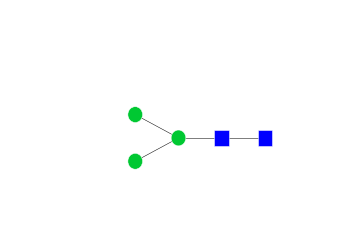

In [10]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
core = select_motifs.nglycan_core
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                                    glycan_core=core,
                                                    linkage_specific=linkage_specific)

In [11]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

substructure_linear_dict = {}
for idex, i in enumerate([_substructure_lab.substructure_vec[i] for i in _substructure_lab.substructure_with_core_list]):
    substructure_linear_dict[idex] = glycoct2linear(i)

In [14]:
json_utility.store_json('../example_data/merging_network/substructure_linear.json', substructure_linear_dict)
#                         json_utility.store_json('../example_data/merging_network/vec_linear.json',string_list)

# loading intermediate network

In [24]:
edge_list=pd.read_csv('/Users/apple/PycharmProjects/GlycoRules/notebooks/epo_network.csv')
edge_list[edge_list.enzyme=='MANII']

,source,target,enzyme
47,GNb2Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN;Asn[mg],GNb2Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg],MANII
55,GNb2Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN;Asn[mg],GNb2Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg],MANII
59,GNb2(GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN;Asn[mg],GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg],MANII
67,GNb2Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg],GNb2Ma3(Ma6)Mb4GNb4GN;Asn[mg],MANII
84,GNb2(GNb4)Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN;Asn[mg],GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg],MANII
86,GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4GN;Asn[mg],GNb2(GNb4)Ma3(Ma6)Mb4GNb4GN;Asn[mg],MANII
100,GNb2Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg],GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN;Asn[mg],MANII
143,GNb2(GNb4)Ma3(Ma6Ma6)Mb4GNb4(Fa6)GN;Asn[mg],GNb2(GNb4)Ma3(Ma6)Mb4GNb4(Fa6)GN;Asn[mg],MANII


In [ ]:
glycan_dict = json_utility.load_json('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/vec_linear.json')
epo_glycans = [glycan_dict[i] for i in sorted(glycan_dict.keys())]
epo_glycans = [glycan+'[tg]' for glycan in epo_glycans]

In [ ]:
print(len(set(epo_glycans) - set(list(edge_list['source']) + list(edge_list['target']))))
set(epo_glycans) - set(list(edge_list['source']) + list(edge_list['target']))

# modify edge rules

In [ ]:
sourse_list = [i[:-8] for i in edge_list.source]
target_list = [i[:-8] for i in edge_list.target]
sourse_list.extend(['Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN','Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN', 'Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN'])
enzyme_list = list(edge_list.enzyme)
enzyme_list.extend(['MANII', 'A6FUCT', 'MANII'])
target_list.extend(['Ma3(Ma3(Ma6)Ma6)Mb4GNb4GN', 'Ma3(Ma3(Ma6)Ma6)Mb4GNb4(Fa6)GN','Ma3(Ma6Ma6)Mb4GNb4GN'])


# for j in edge_list.target:
glycan_series = pd.Series(sorted(list(set(sourse_list+target_list))))
sorted(glycan_series)


# reindex intermediates to edge table...saving time skip reworking 

In [ ]:
# index_source = np.zeros(len(sourse_list), dtype=int)
# index_target = np.zeros(len(target_list), dtype=int)

# for idex, i in enumerate(sourse_list):
# #     print(i)
# #     print(glycan_series[glycan_series==i].index[0])
#     if idex%1000==0:
#         print(idex)
#     index_source[idex] = glycan_series[glycan_series==i].index[0]

# for idex, i in enumerate(target_list):
# #     print(glycan_series[glycan_series==i].index[0])
#     if idex%1000==0:
#         print(idex)
#     index_target[idex] = glycan_series[glycan_series==i].index[0] 
# modified_edge_list = pd.DataFrame(data={'source':sourse_list, 'target':target_list, 'enzyme':enzyme_list})
# modified_edge_list['index_source'] = index_source
# modified_edge_list['index_target'] = index_target
# edge_list_transport_removed = modified_edge_list[modified_edge_list['enzyme']!='transport']
# edge_list_transport_removed[edge_list_transport_removed.index_source==edge_list_transport_removed.index_target]  

In [57]:

edge_list_transport_removed = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/edge_list_transport_removed.csv', index_col=0)
glycan_series = pd.Series.from_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/glycan_series.csv', )

In [48]:
glycan_series


0        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
1        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
2        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
3        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
4        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
5        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
6        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
7        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
8        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
9        Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
10       Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
11       Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
12       Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
13       Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
14       Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
15       Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4...
16       Ab4GNb2(Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4GNb3Ab4.

In [49]:
# glycan_linear = {}
# for i,j in zip(data.id, data.iupac):
#     glycan_linear[i] = j[:-4]

In [50]:
linear_dict = json_utility.load_json('../GlyCompare/example_data/merging_network/substructure_linear.json')
linear_list = pd.Series([linear_dict[i][:-4] for i in linear_dict])
linear_list

0                                       Ma3(Ma6)Mb4GNb4GN
1                                  Ma3(Ma6)Mb4GNb4(Fa6)GN
2                                   GNb4Ma3(Ma6)Mb4GNb4GN
3                                   GNb2Ma3(Ma6)Mb4GNb4GN
4                                   Ma3(GNb6Ma6)Mb4GNb4GN
5                                   Ma3(GNb2Ma6)Mb4GNb4GN
6                                    Ma3(Ma6Ma6)Mb4GNb4GN
7                                    Ma3(Ma3Ma6)Mb4GNb4GN
8                              GNb4Ma3(Ma6)Mb4GNb4(Fa6)GN
9                              GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN
10                             Ma3(GNb6Ma6)Mb4GNb4(Fa6)GN
11                             Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
12                               Ab4GNb4Ma3(Ma6)Mb4GNb4GN
13                               Ab4GNb2Ma3(Ma6)Mb4GNb4GN
14                            GNb2(GNb4)Ma3(Ma6)Mb4GNb4GN
15                              GNb4Ma3(GNb6Ma6)Mb4GNb4GN
16                              GNb2Ma3(GNb6Ma6)Mb4GNb4GN
17            

In [53]:
from glypy.io import linear_code
a_list = []
for idex, i in enumerate(linear_list):
    if len(glycan_series[glycan_series==i].index)==1:
        a_list.append(glycan_series[glycan_series==i].index[0])
    elif len(glycan_series[glycan_series==i].index)>1:
        print('error')
        
updated_substructure_vec_dict = {}

for i in a_list:
    _glycan = linear_code.loads(glycan_series[i])
    _degree = len(_glycan.index)
    if _degree not in updated_substructure_vec_dict.keys():
        updated_substructure_vec_dict[_degree] = [glycan_series[i]]
    else:
        updated_substructure_vec_dict[_degree].append(glycan_series[i])
for i in updated_substructure_vec_dict:
    print(i, len(updated_substructure_vec_dict[i]))
final_substructure_vec = []
for i in sorted(list(updated_substructure_vec_dict.keys())):
    final_substructure_vec.extend(updated_substructure_vec_dict[i])
final_substructure_vec = pd.Series(final_substructure_vec)
#     _glycan.de
# updated_substructure_vec = a_list

6 2
7 5
8 13
9 30
10 60
11 98
12 136
13 163
14 177
15 185
16 184
17 165
18 125
19 76
20 35
21 11
22 2


In [63]:
a_list = pd.Series(a_list)
nodes_remove_table = edge_list_transport_removed[edge_list_transport_removed.index_source.isin(a_list)]
nodes_remove_table = nodes_remove_table[nodes_remove_table.index_target.isin(a_list)]
nodes_remove_table

,source,target,enzyme,index_source,index_target
89,GNb2Ma3(Ma6)Mb4GNb4GN,GNb2Ma3(GNb2Ma6)Mb4GNb4GN,GNTII,18508,18327
91,GNb2Ma3(Ma6)Mb4GNb4GN,GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN,A6FUCT,18508,18507
93,GNb2Ma3(Ma6)Mb4GNb4GN,GNb2(GNb4)Ma3(Ma6)Mb4GNb4GN,GNTIV,18508,15298
104,GNb2Ma3(Ma6)Mb4GNb4GN,Ab4GNb2Ma3(Ma6)Mb4GNb4GN,B4GALT,18508,5104
105,GNb2Ma3(GNb2Ma6)Mb4GNb4GN,GNb2Ma3(GNb2(GNb6)Ma6)Mb4GNb4GN,GNTV,18327,18299
106,GNb2Ma3(GNb2Ma6)Mb4GNb4GN,Ab4GNb2Ma3(GNb2Ma6)Mb4GNb4GN,B4GALT,18327,4949
107,GNb2Ma3(GNb2Ma6)Mb4GNb4GN,GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4GN,B4GALT,18327,18119
117,GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN,Ab4GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN,B4GALT,18507,5103
132,GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN,GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN,GNTII,18507,18326
134,GNb2Ma3(Ma6)Mb4GNb4(Fa6)GN,GNb2(GNb4)Ma3(Ma6)Mb4GNb4(Fa6)GN,GNTIV,18507,15297


In [64]:
import numpy as np 
del nodes_remove_table['index_source']
del nodes_remove_table['index_target']

index_source = np.zeros(len(nodes_remove_table.source), dtype=int)
index_target = np.zeros(len(nodes_remove_table.target), dtype=int)

for idex, i in enumerate(nodes_remove_table.source):
    index_source[idex] = final_substructure_vec[final_substructure_vec==i].index[0]
for idex, i in enumerate(nodes_remove_table.target):
    index_target[idex] = final_substructure_vec[final_substructure_vec==i].index[0] 
    
nodes_remove_table['index_source'] = index_source
nodes_remove_table['index_target'] = index_target

In [65]:
# modified_edge_list = pd.DataFrame(data={'source':sourse_list, 'target':target_list, 'enzyme':enzyme_list})

nodes_remove_table = nodes_remove_table.sort_values(by=['index_source','index_target'])
nodes_remove_table=nodes_remove_table.reset_index(drop=True)
del nodes_remove_table['source']
del nodes_remove_table['target']
# edge_list_transport_removed = modified_edge_list[modified_edge_list['enzyme']!='transport']
# nodes_remove_table[nodes_remove_table.index_source==nodes_remove_table.index_target]

In [69]:
from glypy.io import linear_code
nodes_remove_table.to_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/substructure_dep_tree_core_with_enzyme.csv')
final_substructure_vec_glycoct = []
for i in final_substructure_vec:
    final_substructure_vec_glycoct.append(str(linear_code.loads(i)))
json_utility.store_json('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/refind_glycan_substructure_glycoct_vec.json', final_substructure_vec_glycoct)


# Mapping the linkage-specified intermediate network to linkage-specified substructure network
# Mapping the linkage-specified intermediate network to linkage-unspecified substructure network
# Mapping the glycan to linkage-specified substructure network

In [3]:
# save the main chemical comflic
# mossion combine the substructure tree and substructure tree
# why 

In [4]:
# get edges and tree from linkage specified substructure network
# replace the glycan
# get edges and tree from intermetidate network
# join the edges and tree from intermediate network

# linkage-specified substructure network

In [15]:
linkage_specified_substructure_vec = json_utility.load_json('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/refind_glycan_substructure_glycoct_vec.json')
linkage_specified_substructure_vec = glycan_io.glycan_str_to_glycan_obj(linkage_specified_substructure_vec)
linkage_specified_substructure_dict = glycan_io.substructure_vec_to_substructure_dict(linkage_specified_substructure_vec)
linkage_specified_intermediate_network = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/substructure_dep_tree_core_with_enzyme.csv', index_col=0)
linkage_specified_intermediate_network.head()


,enzyme,index_source,index_target
0,GNTII,0,5
1,A6FUCT,0,2
2,GNTIV,0,4
3,B4GALT,0,3
4,GNTII,2,10


# linkage-unspecified substructure dict

In [16]:
from glycompare.extract_substructures import clean_duplicate
from copy import copy
from glypy.algorithms.subtree_search.inclusion import subtree_of

unspecified_substructure_dict = clean_duplicate(deepcopy(linkage_specified_substructure_dict), linkage_specific=False)
glycan_io.output_glycan_dict_to_glycoct_dict(unspecified_substructure_dict,'/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/unspecified_substructure_dict.json')
unspecified_substructure_vec = glycan_io.substructure_dict_to_substructure_vec(unspecified_substructure_dict)


6 2
7 5
8 9
9 15
10 24
11 36
12 48
13 57
14 63
15 70
16 74
17 68
18 52
19 31
20 15
21 5
22 1
575


In [17]:
glycan_io.output_glycan_dict_to_glycoct_dict(unspecified_substructure_vec, '/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/unspecified_glycan_substructure_glycoct_vec.json')

## mapping

In [18]:
degree_len_dict = {}
for i in unspecified_substructure_dict:
#     print(type(i))
#     print(len(linkage_specified_substructure_dict[i]))
#     print(len(unspecified_substructure_dict[i]))
    degree_len_dict[int(i)] = len(unspecified_substructure_dict[i])
k=0
len_list ={}
for i in sorted(degree_len_dict):
    len_list[i]=k
    k+=degree_len_dict[i]
len_list  
_list = []
for idex, i in enumerate(linkage_specified_substructure_vec):
    _len = len(i.index)
    for kdex, k in enumerate(unspecified_substructure_dict[str(_len)]):
        if subtree_of(i, k, exact=False) == 1:
            _list.append(len_list[_len]+kdex)

# linkage-unspecified intermediate network 

In [19]:
unspecified_intermediate_network = deepcopy(linkage_specified_intermediate_network)
edge_source = linkage_specified_intermediate_network.index_source
edge_target = linkage_specified_intermediate_network.index_target
for idex,i in enumerate(unspecified_intermediate_network.index):
    unspecified_intermediate_network.at[i, 'index_source']=_list[linkage_specified_intermediate_network['index_source'][idex]]
    unspecified_intermediate_network.at[i, 'index_target']=_list[linkage_specified_intermediate_network['index_target'][idex]]
#     unspecified_intermediate_network.to_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/unspecified_intermediate_network.csv')

unspecified_intermediate_network

,enzyme,index_source,index_target
0,GNTII,0,5
1,A6FUCT,0,2
2,GNTIV,0,4
3,B4GALT,0,3
4,GNTII,2,10
5,B4GALT,2,8
6,GNTIV,2,9
7,IGNT,3,14
8,A3SIAT,3,7
9,A6SIAT,3,7


In [20]:
# merge the linkage unspecified substructure rule table
unspecified_intermediate_network = unspecified_intermediate_network.sort_values(by=['index_source', 'index_target'])
unspecified_intermediate_network

,enzyme,index_source,index_target
1,A6FUCT,0,2
3,B4GALT,0,3
2,GNTIV,0,4
0,GNTII,0,5
5,B4GALT,2,8
6,GNTIV,2,9
4,GNTII,2,10
8,A3SIAT,3,7
9,A6SIAT,3,7
7,IGNT,3,14


In [21]:
edge_source = list(unspecified_intermediate_network.index_source)
edge_target = list(unspecified_intermediate_network.index_target)
enzyme_list = [[i] for i in list(unspecified_intermediate_network.enzyme)]

line_count = 1
while line_count < len(edge_source):
    if edge_source[line_count]==edge_source[line_count-1] and edge_target[line_count]==edge_target[line_count-1]:
        enzyme_list[line_count-1].extend(list(enzyme_list[line_count]))
#         print(edge_source[line_count],edge_target[line_count], enzyme_list[line_count-1])
        del enzyme_list[line_count]
        del edge_source[line_count]
        del edge_target[line_count]
    else:
        line_count+=1
enzyme_list = [', '.join(set(sorted(i))) for i in enzyme_list]

merged_unspecified_intermediate_network = pd.DataFrame(data={'enzyme':enzyme_list, 'index_source':edge_source, 'index_target':edge_target})
merged_unspecified_intermediate_network.to_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/unspecified_intermediate_network.csv')


In [22]:
merged_unspecified_intermediate_network

,enzyme,index_source,index_target
0,A6FUCT,0,2
1,B4GALT,0,3
2,GNTIV,0,4
3,GNTII,0,5
4,B4GALT,2,8
5,GNTIV,2,9
6,GNTII,2,10
7,"A3SIAT, A6SIAT",3,7
8,IGNT,3,14
9,A6FUCT,4,9


In [23]:
unspecified_intermediate_network = unspecified_intermediate_network.reset_index(drop=True)

In [22]:
unspecified_intermediate_network[unspecified_intermediate_network.index_target==13]

,enzyme,index_source,index_target
13,GNTII,4,13
17,GNTV,5,13
18,GNTIV,5,13


(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=7.654042494670958e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a245a6390>)

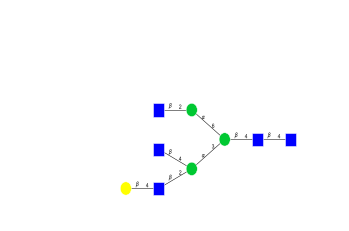

In [16]:
plot_glycan_utilities.plot_glycan(unspecified_substructure_vec[23], label=True)

# mapping with linkage unspecified data

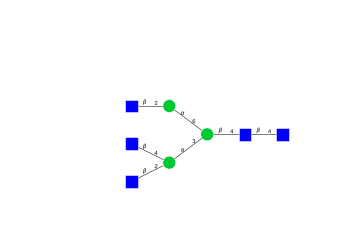

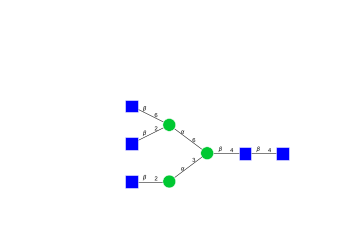

In [17]:
for idex, i in enumerate(_list):
    if i==13:
        plot_glycan_utilities.plot_glycan(linkage_specified_substructure_vec[idex], label=True)

(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=7.654042494670958e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c2088d0>)

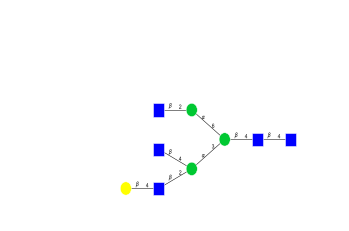